['DEFAULT_HOST',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_authenticate',
 '_authenticated',
 '_cleanup_signal_handler',
 '_default_on_close',
 '_default_on_error',
 '_default_on_message',
 '_default_on_open',
 '_default_process_message',
 '_format_params',
 '_host',
 '_run_thread',
 'auth_key',
 'close_connection',
 'process_message',
 'run',
 'run_async',
 'subscribe',
 'unsubscribe',
 'url',
 'ws']

![modern_portfolio](./images/modern_image_1.png)
![modern_portfolio](./images/modern_image_2.png)
![modern_portfolio](./images/modern_image_3.png)
![modern_portfolio](./images/modern_image_4.png)
![modern_portfolio](./images/modern_image_5.png)
![modern_portfolio](./images/modern_image_6.png)
![modern_portfolio](./images/modern_image_7.png)
![modern_portfolio](./images/modern_image_8.png)
![modern_portfolio](./images/modern_image_9.png)
![modern_portfolio](./images/modern_image_10.png)
![modern_portfolio](./images/modern_image_11.png)
![modern_portfolio](./images/modern_image_12.png)
![modern_portfolio](./images/modern_image_13.png)
![modern_portfolio](./images/modern_image_14.png)
![modern_portfolio](./images/modern_image_15.png)
![modern_portfolio](./images/modern_image_16.png)
![modern_portfolio](./images/modern_image_17.png)
![modern_portfolio](./images/modern_image_18.png)
![modern_portfolio](./images/modern_image_19.png)
![modern_portfolio](./images/modern_image_20.png)
![modern_portfolio](./images/modern_image_21.png)
![modern_portfolio](./images/modern_image_22.png)


In [151]:
from pycoingecko import CoinGeckoAPI
import pandas_datareader as web
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm
import numpy as np
from polygon import WebSocketClient, CRYPTO_CLUSTER
from polygon import RESTClient
from datetime import datetime
import quandl

In [38]:
key="5hL7QDEH0AZtuOo4CanFEdSDY7gok1AP"
quandl.ApiConfig.api_key = 'zKYsMEfvyGrpJ-bk5J2V'

In [152]:
pc = WebSocketClient(CRYPTO_CLUSTER,key)
poly_rc = RESTClient(key)

In [32]:
# Min 2 years of data
start_date = datetime(2017,1,1)
end_date = datetime(2022,1,17)
coins = ['SOL','ETH','FTM','LUNA','AVAX','DOT','ADA','FLOW','MATIC']

# Current 10 Year Treasury Yield as of 01/17/2022
risk_free_rate = 0.01793

In [36]:
symbols = web.nasdaq_trader.get_nasdaq_symbols()
symbols.head()
symbols.tail()

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
ZXZZT,True,NASDAQ TEST STOCK,Q,G,False,100.0,True,N,NaN,ZXZZT,False
ZY,True,Zymergen Inc. - Common Stock,Q,Q,False,100.0,False,N,NaN,ZY,False
ZYME,True,Zymeworks Inc. Common Shares,N,,False,100.0,False,NaN,ZYME,ZYME,False
ZYNE,True,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,False,100.0,False,N,NaN,ZYNE,False
ZYXI,True,"Zynex, Inc. - Common Stock",Q,Q,False,100.0,False,N,NaN,ZYXI,False


In [46]:
sol_df = quandl.get_table('BIC/CA', date='2017-01-01,2022-01-17', symbol='ETH')
sol_df.tail()

,symbol,name,erc20,date,exchange_inflow,exchange_outflow,exchange_deposits,exchange_withdrawals,exchange_balance,exchange_net_flow,...,sending_addresses,receiving_addresses,new_addresses,active_addresses,difficulty,hash_rate,miner_revenue,total_fees,gas_used,gas_price
None,,,,,,,,,,,,,,,,,,,,,


In [47]:
cg = CoinGeckoAPI()

In [53]:
prices = cg.get_price(ids='ethereum, solana, polkadot, ftm', vs_currencies='usd')
prices

{'polkadot': {'usd': 25.89},
 'solana': {'usd': 139.65},
 'ethereum': {'usd': 3222.96}}

In [57]:
sol_history = cg.get_coin_history_by_id('solana',date='01-01-2020')
sol_history

{'id': 'solana',
 'symbol': 'sol',
 'name': 'Solana',
 'localization': {'en': 'Solana',
  'de': 'Solana',
  'es': 'Solana',
  'fr': 'Solana',
  'it': 'Solana',
  'pl': 'Solana',
  'ro': 'Solana',
  'hu': 'Solana',
  'nl': 'Solana',
  'pt': 'Solana',
  'sv': 'Solana',
  'vi': 'Solana',
  'tr': 'Solana',
  'ru': 'Solana',
  'ja': 'ソラナ',
  'zh': 'Solana',
  'zh-tw': 'Solana',
  'ko': 'Solana',
  'ar': 'Solana',
  'th': 'Solana',
  'id': 'Solana'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/4128/thumb/solana.png?1640133422',
  'small': 'https://assets.coingecko.com/coins/images/4128/small/solana.png?1640133422'}}

In [58]:
coins = cg.get_coins_list()
coins

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand Token'},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index Token'},
 {'id': '0-5x-long-balancer-token',
  'symbol': 'balhalf',
  'name': '0.5X Long Balancer Token'},
 {'id': '0-5x-long-bitcoin-cash-token',
  'symbol': 'bchhalf',
  'name': '0.5X Long Bitcoin Cash Token'},
 {'id': '0-5x-long-bitcoin-sv-token',
  'symbol': 'bsvhalf',
  'name': '0.5X Long Bitcoin SV Token'},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin Token'},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'adahalf',
  'name': '0.5X Long Cardano Token'},
 {'id': '0-5x-long-chainlink-token',
  'symbol': 'linkhalf',
  'name': '0.5X Long Chainlink Token'},
 {'id': '0-5x-long-cosmos-token',
  'symbol': 'atomhalf',
  'name': '0.5X Long Cosmos Token'},
 {'id': '0-5x-long-defi-index-token',
  'symbol'

In [71]:
sol_ohlc_history = cg.get_coin_ohlc_by_id('solana',vs_currency='usd',days=365)
len(sol_ohlc_history)


96

In [70]:
dot_ohlc_history = cg.get_coin_ohlc_by_id('polkadot',vs_currency='usd',days=365)
len(dot_ohlc_history)

96

In [69]:
ftm_ohlc_history = cg.get_coin_ohlc_by_id('fantom',vs_currency='usd',days=365)
len(ftm_ohlc_history)

96

## CSV Based Data

In [189]:
sol_df = pd.read_csv("./data/Binance_SOLUSDT_d.csv")
#print(sol_df['unix'])
sol_df['date'] = pd.to_datetime(sol_df['date'])
sol_df['unix'] = pd.to_datetime(sol_df['unix'],unit='ms')
sol_df.set_index('date',inplace=True)
sol_df = sol_df.drop('unix',1)

#sol_df.columns
sol_df.tail()

,symbol,open,high,low,close,Volume SOL,Volume USDT,tradecount
date,,,,,,,,
2020-09-18,SOL/USDT,2.8821,3.1500,2.7240,3.1080,6310796.0,1.869180e+07,84568
2020-09-17,SOL/USDT,2.5400,2.9360,2.3569,2.8855,6499338.0,1.703056e+07,85456
2020-09-16,SOL/USDT,2.9299,2.9299,2.4316,2.5395,5698128.0,1.485683e+07,74645
2020-09-15,SOL/USDT,3.2629,3.3258,2.9001,2.9332,4318305.0,1.362171e+07,52431
2020-09-14,SOL/USDT,3.2002,4.9100,3.2002,3.2661,4788171.0,1.603678e+07,64892


In [188]:
eth_df = pd.read_csv("./data/Binance_ETHUSDT_d.csv",index_col='date',parse_dates=True)
eth_df.drop('unix',1,inplace=True)
eth_df.tail()

,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
date,,,,,,,,
2017-08-21,ETH/USDT,299.10,346.52,294.60,323.29,5134.54,1661944.36,NaN
2017-08-20,ETH/USDT,290.91,300.53,282.85,299.10,2469.49,730800.66,NaN
2017-08-19,ETH/USDT,293.96,299.90,278.00,290.91,2140.08,618248.58,NaN
2017-08-18,ETH/USDT,302.00,311.79,283.94,293.96,9392.79,2815460.24,NaN
2017-08-17,ETH/USDT,303.61,312.18,298.21,302.00,6155.32,1890017.53,NaN


In [187]:
dot_df = pd.read_csv("./data/Binance_DOTUSDT_d.csv",index_col='date',parse_dates=True)
dot_df.drop('unix',1,inplace=True)
dot_df.tail()

,symbol,open,high,low,close,Volume DOT,Volume USDT,tradecount
date,,,,,,,,
2020-08-26,DOT/USDT,5.560,6.598,5.102,6.092,51031902.3,3.000348e+08,718104
2020-08-25,DOT/USDT,4.585,5.776,4.492,5.560,54379664.2,2.746572e+08,755276
2020-08-24,DOT/USDT,3.993,4.810,3.755,4.594,27131790.2,1.163154e+08,347435
2020-08-23,DOT/USDT,4.482,4.500,3.706,3.993,23021804.0,9.277049e+07,288821
2020-08-22,DOT/USDT,2.920,5.100,2.920,4.465,34281718.6,1.338785e+08,415916


In [186]:
matic_df = pd.read_csv("./data/Binance_MATICUSDT_d.csv",index_col='date',parse_dates=True)
matic_df.drop('unix',1,inplace=True)
matic_df.tail()

,symbol,open,high,low,close,Volume MATIC,Volume USDT,tradecount
date,,,,,,,,
2019-04-30,MATIC/USDT,0.00346,0.00516,0.00346,0.00442,1.165707e+09,5.268820e+06,14764
2019-04-29,MATIC/USDT,0.00442,0.00456,0.00343,0.00347,5.205576e+08,2.090179e+06,7321
2019-04-28,MATIC/USDT,0.00521,0.00527,0.00434,0.00442,4.571840e+08,2.218765e+06,7463
2019-04-27,MATIC/USDT,0.00543,0.00586,0.00516,0.00521,4.403390e+08,2.401118e+06,7591
2019-04-26,MATIC/USDT,0.00263,0.01052,0.00263,0.00545,2.251813e+09,1.316594e+07,29783


In [185]:
ada_df = pd.read_csv("./data/Binance_ADAUSDT_d.csv",index_col='date',parse_dates=True)
ada_df.drop('unix',1,inplace=True)
ada_df.tail()

,symbol,open,high,low,close,Volume ADA,Volume USDT,tradecount
date,,,,,,,,
2018-04-21,ADA/USDT,0.30161,0.30700,0.26509,0.28668,92719842.91,2.653939e+07,55256
2018-04-20,ADA/USDT,0.27004,0.30442,0.26648,0.30108,71084276.49,2.027089e+07,46506
2018-04-19,ADA/USDT,0.26199,0.27500,0.25777,0.27004,50859980.22,1.360991e+07,32600
2018-04-18,ADA/USDT,0.24260,0.26460,0.24201,0.26200,31328095.79,7.922134e+06,21684
2018-04-17,ADA/USDT,0.25551,0.28800,0.23983,0.24260,67462293.24,1.741182e+07,42568


## Polygon

In [150]:
poly_rc.crypto_historic_crypto_trades()

In [219]:
# we will use the close price
coin_close_columns = ['sol','eth','matic','dot','ada']
agg_close_df = pd.DataFrame(columns=coin_close_columns)
#agg_df.set_index('date',inplace=True)
#agg_df['date'] = ada_df['date']
agg_close_df['eth'] = eth_df['close']
agg_close_df['ada'] = ada_df['close']
agg_close_df['sol'] = sol_df['close']
agg_close_df['matic'] = matic_df['close']
agg_close_df['dot'] = dot_df['close']
agg_close_df.head()

,sol,eth,matic,dot,ada
date,,,,,
2022-01-17,147.40,3337.02,2.337,27.49,1.408
2022-01-16,147.98,3346.88,2.332,27.70,1.410
2022-01-15,147.64,3326.04,2.346,27.60,1.291
2022-01-14,146.17,3307.42,2.334,27.75,1.292
2022-01-13,146.14,3240.61,2.265,25.79,1.233


In [220]:
agg_close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1616 entries, 2022-01-17 to 2017-08-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sol     491 non-null    float64
 1   eth     1616 non-null   float64
 2   matic   998 non-null    float64
 3   dot     514 non-null    float64
 4   ada     1372 non-null   float64
dtypes: float64(5)
memory usage: 75.8 KB


In [315]:
# clean up bottom of data set
GLOBAL_NUMBER_OF_TRADING_DAYS = (datetime(2022,1,17) - datetime(2020,9,15)).days
agg_close_df = agg_close_df[agg_close_df.index > datetime(2020,9,15)]
agg_close_df.tail(), GLOBAL_NUMBER_OF_TRADING_DAYS

(               sol     eth    matic    dot      ada
 date                                               
 2020-09-20  2.8635  371.04  0.02188  4.661  0.08936
 2020-09-19  3.0193  385.25  0.02088  4.929  0.09141
 2020-09-18  3.1080  384.39  0.02103  5.268  0.09093
 2020-09-17  2.8855  389.36  0.02044  5.340  0.09408
 2020-09-16  2.5395  365.11  0.01981  5.082  0.09151,
 489)

In [316]:
# max is sol which is 2020 September 020-09-14


In [317]:
#agg_df.drop(index=[490])

Text(0.5, 1.0, 'Price Over Time For Selected Coins')

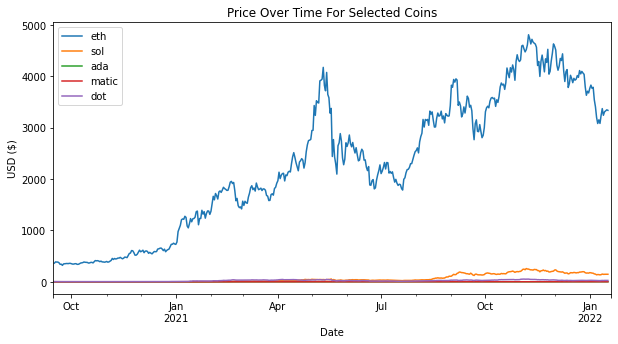

In [318]:
ax = agg_close_df.plot(y=['eth','sol','ada','matic','dot'],figsize=(10,5))
ax.set_xlim(pd.Timestamp('2020-09-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("USD ($)")
ax.set_xlabel("Date")
ax.set_title('Price Over Time For Selected Coins')

In [340]:
# Calculate the Return
def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return  log_return[1:]

agg_vol_columns = ['sol','eth','matic','dot','ada']
agg_vol_df = pd.DataFrame(columns=agg_vol_columns)

#agg_vol_df['eth'] = np.log(agg_df['eth_close']/agg_df['eth_close'].shift(1))
#agg_vol_df['sol'] = np.log(agg_df['sol_close']/agg_df['sol_close'].shift(1))
#agg_vol_df['dot'] = np.log(agg_df['dot_close']/agg_df['dot_close'].shift(1))
#agg_vol_df['ada'] = np.log(agg_df['ada_close']/agg_df['ada_close'].shift(1))
#agg_vol_df['matic'] = np.log(agg_df['matic_close']/agg_df['matic_close'].shift(1))


agg_vol_df = calculate_return(agg_close_df)
agg_vol_df.head()

,sol,eth,matic,dot,ada
date,,,,,
2022-01-16,0.003927,0.002950,-0.002142,0.007610,0.001419
2022-01-15,-0.002300,-0.006246,0.005985,-0.003617,-0.088173
2022-01-14,-0.010007,-0.005614,-0.005128,0.005420,0.000774
2022-01-13,-0.000205,-0.020407,-0.030009,-0.073249,-0.046741
2022-01-12,0.036087,0.039525,0.057060,0.057632,0.062102


Text(0.5, 1.0, 'Log Normailzed Return Over Time For 5 Selected Coins')

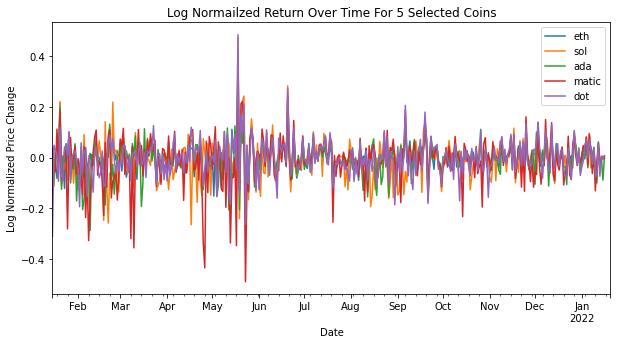

In [341]:
ax = agg_vol_df.plot(y=['eth','sol','ada','matic','dot'],figsize=(10,5))
ax.set_xlim(pd.Timestamp('2021-01-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("Log Normalized Price Change")
ax.set_xlabel("Date")
ax.set_title('Log Normailzed Return Over Time For 5 Selected Coins')

In [342]:
def get_stats(data):
    # Annualize Metric
  
    print(f'Calculating for {365} trading days assuming 365/24/7 markets')
    # Mean
    print(data.mean() * 365)
    # Covariance
    print(data.cov() * 365)
    
agg_return_columns = ['sol','eth','matic','dot','ada']
agg_ret_df = pd.DataFrame(columns=agg_return_columns)

get_stats(agg_vol_df)




Calculating for 489 trading days assuming 365/24/7 markets
sol     -4.069505
eth     -2.217169
matic   -4.780212
dot     -1.691577
ada     -2.739079
dtype: float64
            sol       eth     matic       dot       ada
sol    3.278203  1.136042  1.614941  1.376665  1.109067
eth    1.136042  1.366896  1.433804  1.384002  1.111038
matic  1.614941  1.433804  3.954878  1.782946  1.679627
dot    1.376665  1.384002  1.782946  2.581511  1.478592
ada    1.109067  1.111038  1.679627  1.478592  2.035107


In [307]:
# Calculate the mean and variance
# 6 coin porfolio with available sample data
# eth sol  matic dot ada
# 50   20 10    10  10

# 3 coins portfolio
# eth sol  matic dot ada
# 50   30 20      0 0




def show_mean_variance(returns, weights):
    
    # Annualized
    portfolio_return = np.sum(returns.mean()* weights * GLOBAL_NUMBER_OF_TRADING_DAYS)
    portfolio_volatility = np.dot(weights.T) * np.dot(returns.cov() * GLOBAL_NUMBER_OF_TRADING_DAYS, weights)
    
    print(f"Expected protfolio mean (return): {portfolio_return}")
    print(f"Expected portfolio volatility (standard deviation): {portfolio_volatility}")

    

In [322]:
# we will use the close price
coin_close_columns = ['sol','eth','matic']
agg_close_df_three_coins = pd.DataFrame(columns=coin_close_columns)
#agg_df.set_index('date',inplace=True)
#agg_df['date'] = ada_df['date']
agg_close_df_three_coins['eth'] = eth_df['close']
agg_close_df_three_coins['sol'] = sol_df['close']
agg_close_df_three_coins['matic'] = matic_df['close']
agg_close_df_three_coins.head()

,sol,eth,matic
date,,,
2022-01-17,147.40,3337.02,2.337
2022-01-16,147.98,3346.88,2.332
2022-01-15,147.64,3326.04,2.346
2022-01-14,146.17,3307.42,2.334
2022-01-13,146.14,3240.61,2.265


Text(0.5, 1.0, 'Price Over Time For 3 Selected Coins')

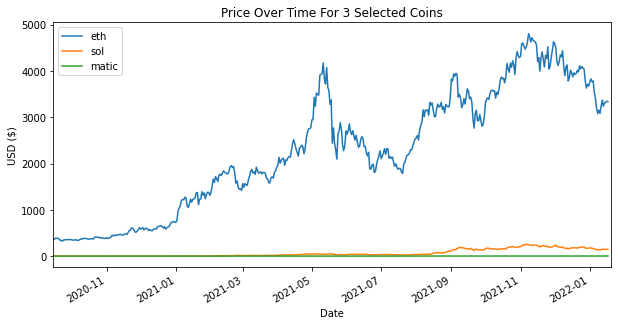

In [326]:
ax = agg_close_df_three_coins.plot(y=['eth','sol','matic'],figsize=(10,5))
ax.set_xlim(pd.Timestamp('2020-09-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("USD ($)")
ax.set_xlabel("Date")
ax.set_title('Price Over Time For 3 Selected Coins')

Text(0.5, 1.0, 'Log Normailzed Return Over Time For 3 Selected Coins')

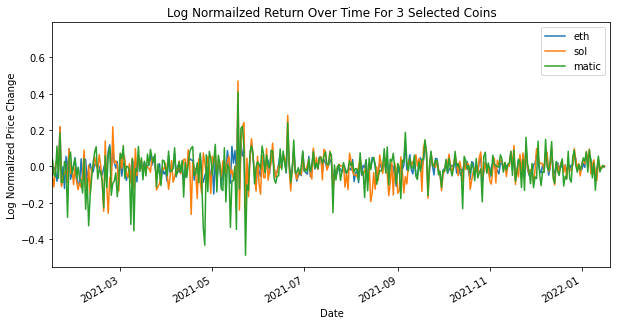

In [327]:
agg_vol_columns_3 = ['sol','eth','matic']
agg_vol_df_three_coins = pd.DataFrame(columns=agg_vol_columns_3)
agg_vol_df_three_coins = calculate_return(agg_close_df_three_coins)

ax = agg_vol_df_three_coins.plot(y=['eth','sol','matic'],figsize=(10,5))
ax.set_xlim(pd.Timestamp('2021-01-15'),pd.Timestamp('2022-01-20'))
ax.set_ylabel("Log Normalized Price Change")
ax.set_xlabel("Date")
ax.set_title('Log Normailzed Return Over Time For 3 Selected Coins')

In [329]:
agg_return_columns_3 = ['sol','eth','matic']
agg_ret_df_three_coins = pd.DataFrame(columns=agg_return_columns_3)

get_stats(agg_vol_df_three_coins)

Calculating for 489 trading days assuming 365/24/7 markets
sol     -3.801779
eth     -0.727416
matic   -2.972751
dtype: float64
            sol       eth     matic
sol    3.301304  1.136232  1.613730
eth    1.136232  1.434279  1.344456
matic  1.613730  1.344456  4.116626


In [354]:
# Monte Carlo 3 Coin Portfolio SOL / ETH / MATIC
NUM_PORFOLIOS = 1000
portfolio_five_weights = [0.50,0.30,0.10,0.05,0.05]
portfolio_three_weights = [0.50,0.30,0.20]
def generate_portfolios(returns, specified_weights):
    means = []
    risks = []
    weights = []
    
    for _ in range(NUM_PORFOLIOS):
        # weights
        w = np.random.random(len(specified_weights))
        w /= np.sum(w)
        weights.append(w)
        
        # means
        m = np.sum(returns.mean() * w * GLOBAL_NUMBER_OF_TRADING_DAYS)
        means.append(m)
        
        # risk
        r = np.sqrt(np.dot(w.T, np.dot(returns.cov() * GLOBAL_NUMBER_OF_TRADING_DAYS, w)))
        risks.append(r)
    return np.array(weights), np.array(means), np.array(risks)

def show_portfolios(returns, vols):
    plt.figure(figsize=(10,6))
    plt.scatter(vols,returns, c=returns/vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

In [372]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [365]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * GLOBAL_NUMBER_OF_TRADING_DAYS
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * GLOBAL_NUMBER_OF_TRADING_DAYS, weights)))
    
    # last value is the sharpe ratio
    return np.array([portfolio_return, portfolio_vol, portfolio_return/portfolio_vol])

#scipy optimize module can find the min of a given function
#max of f(x) is the min of -f(x)
def min_sharpe_ratio(weights, returns):
    return -1*statistics(weights,returns)[2]

def optimize_portfolio(weights, returns,num_of_assets):
    constraints = {
                    'type': 'eq',
                    'fun': lambda x: np.sum(x) - 1                  
                  }
    bounds = tuple((0,1) for _ in range(num_of_assets))
    return opt.minimize(fun=min_sharpe_ratio, 
                 x0=weights[0],
                 args=returns,
                 method='SLSQP', 
                 bounds=bounds,
                constraints=constraints)
     

def show_optimal_portfolio(optimum, returns,preturns, pvols):
    print(f"Optimum portfolio: {optimum['x'].round(3)}")
    print(f"Expected Return {optimum['x'].round(3)}")
    print(f"Sharpe Raito: {returns}")
    plt.figure(figsize=(10,6))
    plt.scatter(pvols, preturns, c=preturns/pvols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'], returns)[1], statistics(optimum['x'], returns)[0],'g*',markersize=20)
    plt.show()
    



In [366]:
agg_vol_df.tail()

,sol,eth,matic,dot,ada
date,,,,,
2020-09-20,0.039027,0.086306,0.151184,0.135833,0.112774
2020-09-19,0.052980,0.037583,-0.046781,0.055906,0.022682
2020-09-18,0.028954,-0.002235,0.007158,0.066515,-0.005265
2020-09-17,-0.074281,0.012847,-0.028456,0.013575,0.034056
2020-09-16,-0.127731,-0.064306,-0.031307,-0.049521,-0.027697


Monte Carlo 100k Markowitz Portfolio Optimization With 5 Coins


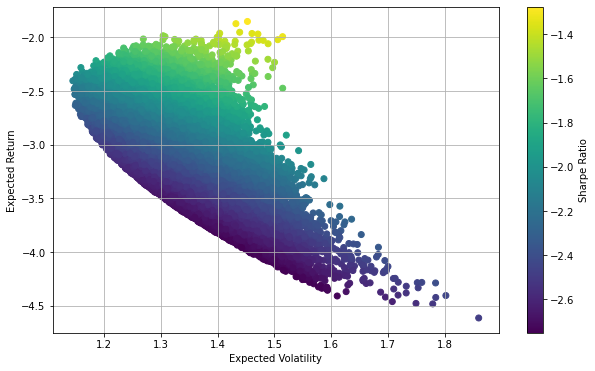

Optimum portfolio: [0. 0. 0. 1. 0.]
Expected Return [0. 0. 0. 1. 0.]
Sharpe Raito:                  sol       eth     matic       dot       ada
date                                                        
2022-01-16  0.003927  0.002950 -0.002142  0.007610  0.001419
2022-01-15 -0.002300 -0.006246  0.005985 -0.003617 -0.088173
2022-01-14 -0.010007 -0.005614 -0.005128  0.005420  0.000774
2022-01-13 -0.000205 -0.020407 -0.030009 -0.073249 -0.046741
2022-01-12  0.036087  0.039525  0.057060  0.057632  0.062102
...              ...       ...       ...       ...       ...
2020-09-20  0.039027  0.086306  0.151184  0.135833  0.112774
2020-09-19  0.052980  0.037583 -0.046781  0.055906  0.022682
2020-09-18  0.028954 -0.002235  0.007158  0.066515 -0.005265
2020-09-17 -0.074281  0.012847 -0.028456  0.013575  0.034056
2020-09-16 -0.127731 -0.064306 -0.031307 -0.049521 -0.027697

[488 rows x 5 columns]


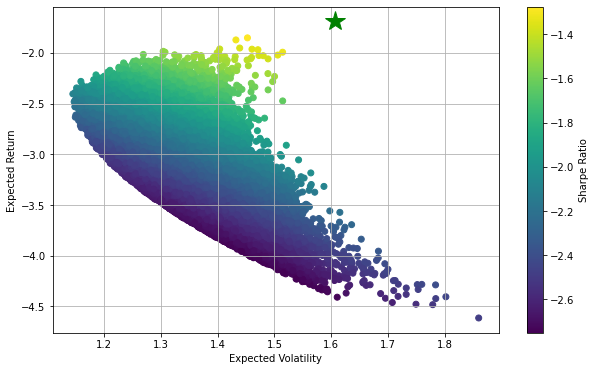

In [367]:
pweights, pmeans, prisks = generate_portfolios(agg_vol_df,portfolio_five_weights)
print(f"Monte Carlo 100k Markowitz Portfolio Optimization With 5 Coins")
show_portfolios(pmeans, prisks)
popt = optimize_portfolio(pweights, agg_vol_df,5)
show_optimal_portfolio(popt, agg_vol_df,pmeans, prisks)


Monte Carlo Markowitz Portfolio Optimization With 3 Coins
Optimum portfolio: [0. 1. 0.]
Expected Return [0. 1. 0.]
Sharpe Raito:                  sol       eth     matic
date                                    
2022-01-16  0.003927  0.002950 -0.002142
2022-01-15 -0.002300 -0.006246  0.005985
2022-01-14 -0.010007 -0.005614 -0.005128
2022-01-13 -0.000205 -0.020407 -0.030009
2022-01-12  0.036087  0.039525  0.057060
...              ...       ...       ...
2017-08-21       NaN  0.042623       NaN
2017-08-20       NaN -0.077772       NaN
2017-08-19       NaN -0.027764       NaN
2017-08-18       NaN  0.010430       NaN
2017-08-17       NaN  0.026983       NaN

[1615 rows x 3 columns]


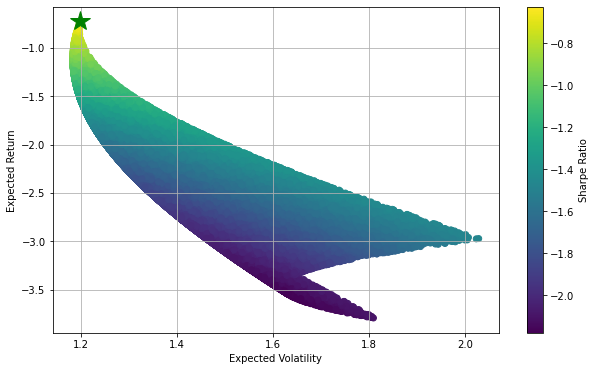

In [371]:
pweights, pmeans, prisks = generate_portfolios(agg_vol_df_three_coins,portfolio_three_weights)
print(f"Monte Carlo Markowitz Portfolio Optimization With 3 Coins")
popt = optimize_portfolio(pweights, agg_vol_df_three_coins,3)
show_optimal_portfolio(popt, agg_vol_df_three_coins,pmeans, prisks)